<center>
<h1 style="color: #007BC4;">Curso de programación con Python</h1> 
<h3 style="color: #333333;">Semana 4 - Ejemplo operaciones arrays numpy</h3> 
</center>
<br>

In [1]:
import numpy as np
import matplotlib.pylab as plt
from skimage.io import imread
import time

In [2]:
def muestra_imagenes(fig_width=10, *images, titles=[]):
    """Muesta las imágenes recibidas en una fila.
    
    Parámetros:
    - fig_width (int): Tamaño en el que se muestran las imágenes (unidades: pulgadas)
    - images (list): Lista de imágenes a mostrar
    - titles (list): Lista de títulos a mostrar. Opcional. Si se recibe la lista de títulos
      y el tamaño de la lista coincide con el de las imágenes, se muestra el título de cada
      imagen sobre ella.
    
    """    
    plt.figure(figsize=(fig_width, fig_width))
    images_count = len(images)
    show_titles = len(titles) == len(images)
    index = 1  
    for image in images:
        plt.subplot(1, images_count, index)
        if show_titles:
            plt.title(titles[index-1])
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        index+=1    

<h2 style="color: #007BC4;">Ejemplo</h2>
<hr style="border: 0.5px solid #007BC4;">

Desarrollar un programa en python que lea una imagen rgb y:

La convierta a sepia, aplicando el siguiente cálculo sobre cada píxel (a matriz sepia será también una matriz 3D):
   - Nuevo rojo = min(rojo actual * 0.393 + verde actual × 0.769 + azul actual × 0.189, 255)
   - Nuevo verde = min(rojo actual * 0.349 + verde actual × 0.686 + azul actual × 0.168, 255)
   - Nuevo azul = min(rojo actual × 0.272 + verde actual × 0.534 + azul actual × 0.131, 255)

La convierta a escala de grises, aplicando el siguiente cálculo (la matriz de escala de grises será una matriz 2D):
   - Pixel = round(0.2125 x rojo actual + 0.7154 x verde actual + 0.0721 x azul actual)
   
<br>
Una imagen RGB es una matriz en la que cada elemento es una lista con los tres valores de los colores R, G y B. Por ejemplo, la siguiente imagen que representa 6 píxeles (está ampliada para su visualización) se corresponde con la matriz numpy que se muestra debajo:
<br><br>

<div>
    <img src="img/img6pixel.png" style="max-height:150px;">
</div>

<div>
<pre>


[
 [[255,   0,   0], [  0, 255,   0], [  0,   0, 255]],
 [[255, 255,   0], [255, 255, 255], [  0,   0,   0]]
]
 
 
</pre>
</div>

<br>
Ejemplo del resultado buscado con dos imágenes:<br>


<img src="img/img6px_resultado.png">
<br>
<img src="img/image_resultado.png">


In [3]:
# Tras ejecutar esta línea, image contiene una matriz de numpy de 3D.
image = imread('img/python-img.jpg') 


# Creación de la imagen de 6 pixels:
image_6px = np.array([
 [[255,   0,   0], [  0, 255,   0], [  0,   0, 255]],
 [[255, 255,   0], [255, 255, 255], [  0,   0,   0]]
])


In [7]:
image.shape

(480, 860, 3)

In [4]:
# SOLUCIÓN

def convertir_sepia(pixel):
    red,green,blue = pixel
    new_red = round(min(red * 0.393 + green * 0.769 + blue * 0.189, 255))
    new_green = round(min(red * 0.349 + green * 0.686 + blue * 0.168, 255))
    new_blue = round(min(red * 0.272 + green * 0.534 + blue * 0.131, 255))
    return new_red,new_green,new_blue

def convertir_a_grises(pixel):
    red,green,blue = pixel
    return round(0.2125*red + 0.7154*green + 0.0721*blue)

def rgb_a_sepia(image):
    new_image = []           
    for row in image:
        new_row = list(map(convertir_sepia,row))
        new_image.append(new_row)
        
    return new_image

def rgb_a_sepia_numpy(rgb):
    sepia = np.ones(rgb.shape)       
    red = rgb[:,:,0]
    green = rgb[:,:,1]
    blue = rgb[:,:,2]
    sepia[:,:,0] = sepia[:,:,0] * (red * 0.393 + green * 0.769 + blue * 0.189)
    sepia[:,:,1] = sepia[:,:,1] * (red * 0.349 + green * 0.686 + blue * 0.168)
    sepia[:,:,2] = sepia[:,:,2] * (red * 0.272 + green * 0.534 + blue * 0.131)
    
    sepia = np.clip(sepia, 0, 255)
    sepia_int = sepia.astype(int)
    return sepia_int    


def rgb_to_gray(image):
    gray_image = []
    for row in image:
        new_row = list(map(convertir_a_grises,row))
        gray_image.append(new_row)
    return gray_image

def rgb_to_gray_numpy(rgb): 
    gray = np.ones((rgb.shape[0],rgb.shape[1]))
    red = rgb[:,:,0]
    green = rgb[:,:,1]
    blue = rgb[:,:,2]
    gray = gray * (0.2125*red + 0.7154*green + 0.0721*blue)
    return gray        


Imagen Python (bucles):  12.7173330783844  seconds


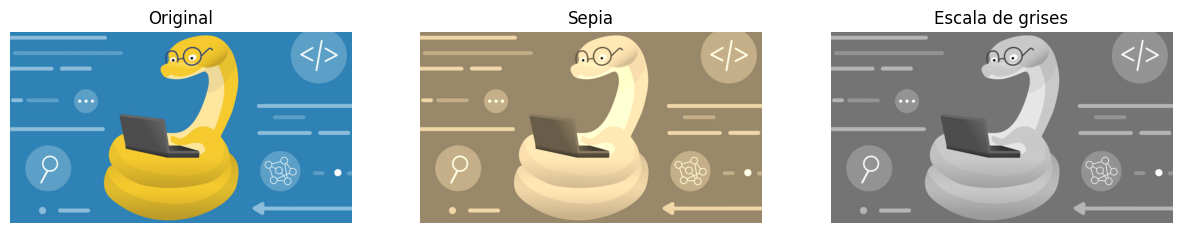

In [5]:
# Usando funciones listas y bucles
start = time.time()
muestra_imagenes(15,image,rgb_a_sepia(image), rgb_to_gray(image), titles=["Original", "Sepia", "Escala de grises"])
print('\nImagen Python (bucles): ', time.time() - start, ' seconds')


Imagen Python (numpy):  0.08921504020690918  seconds


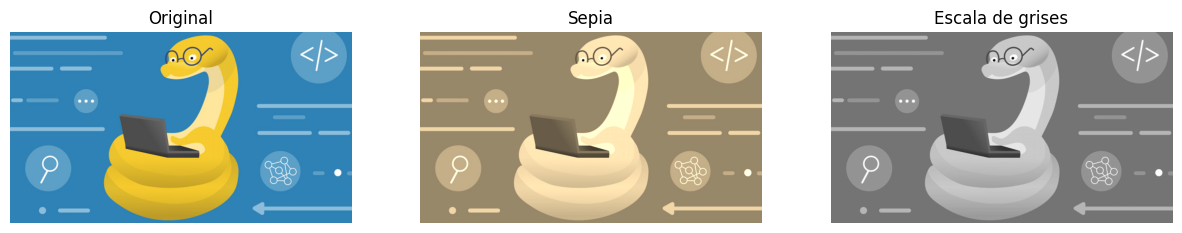

In [6]:
# Usando funciones con operaciones de numpy
start = time.time()
muestra_imagenes(15,image,rgb_a_sepia_numpy(image), rgb_to_gray_numpy(image), titles=["Original", "Sepia", "Escala de grises"])
print('\nImagen Python (numpy): ', time.time() - start, ' seconds')
